In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv("/content/terrorist-attacks new.csv")
df

,Entity,Code,Year,Terrorist attacks
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,1
4,Afghanistan,AFG,1974,0
...,...,...,...,...
10512,Zimbabwe,ZWE,2017,3
10513,Zimbabwe,ZWE,2018,2
10514,Zimbabwe,ZWE,2019,2
10515,Zimbabwe,ZWE,2020,1


In [18]:
# Check Dataset

print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,Category,Quantity,Total
0,A,10,100
1,B,20,200
2,A,15,150
3,B,25,250
4,A,30,300


In [19]:
# Check Dataset

print('### last 5 lines ###','\n')
df.tail()

### last 5 lines ### 



,Category,Quantity,Total
0,A,10,100
1,B,20,200
2,A,15,150
3,B,25,250
4,A,30,300


In [20]:
# Check row and column numbers

rows = df.shape[0]
cols = df.shape[1]
print("Rows   : " + str(rows))
print("Columns: " + str(cols))

Rows   : 5
Columns: 3


In [21]:
# Check Dataframe information

print('### Dataframe information ###','\n')
df.info()

### Dataframe information ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5 non-null      object
 1   Quantity  5 non-null      int64 
 2   Total     5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [22]:
# Null Data

print('### Total Null Data in DataFrame ###','\n')
df.isnull().sum()

### Total Null Data in DataFrame ### 



Category    0
Quantity    0
Total       0
dtype: int64

In [23]:
# Check duplicate data

print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [27]:
# Let's create a dataframe just for the world's data
df_world = df[df['Entity'] == 'World']
df_world.head()

,Entity,Code,Year,Terrorist attacks
10178,World,OWID_WRL,1970,644
10179,World,OWID_WRL,1971,465
10180,World,OWID_WRL,1972,559
10181,World,OWID_WRL,1973,466
10182,World,OWID_WRL,1974,570


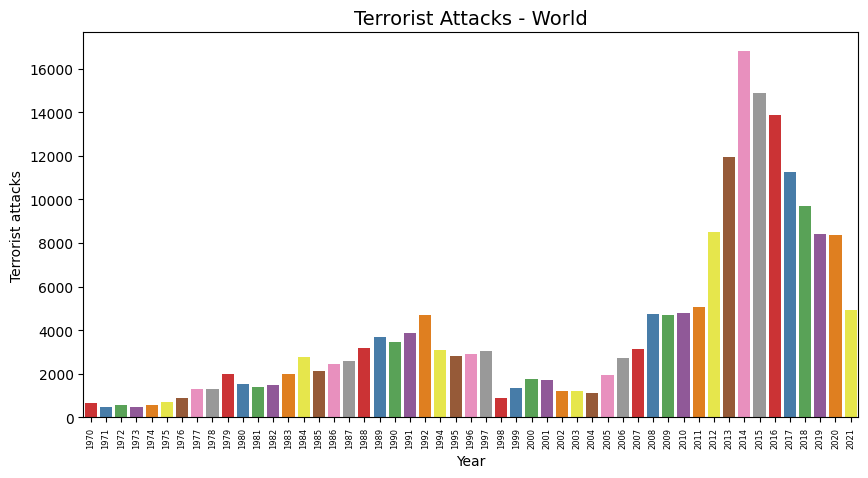

In [29]:
# Terrorist attacks - World
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_world, x = 'Year', y = 'Terrorist attacks', palette = 'Set1')
plt.title("Terrorist Attacks - World", fontsize = 14)
plt.xticks(rotation=90, fontsize = 6)
plt.show()

In [30]:
# Let's create a dataframe just for the Continent's data

options = ['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America', 'Central America & Caribbean']

# selecting rows based on condition
cont_df = df.loc[df['Entity'].isin(options)]
cont_df.head()

,Entity,Code,Year,Terrorist attacks
51,Africa,NaN,1970,4
52,Africa,NaN,1971,3
53,Africa,NaN,1972,2
54,Africa,NaN,1973,5
55,Africa,NaN,1974,7


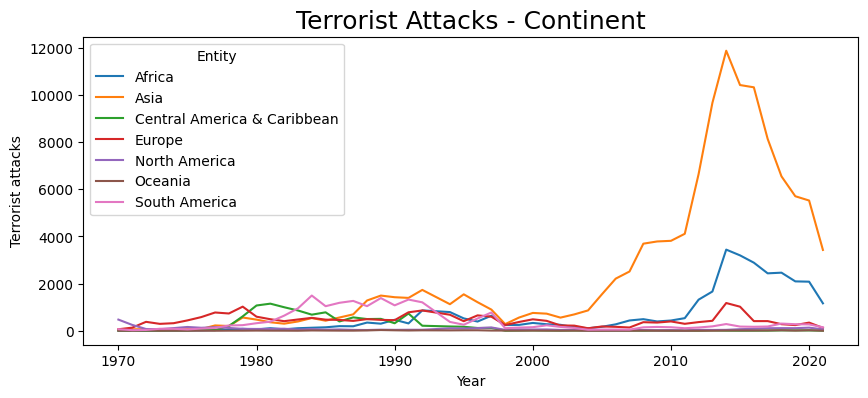

In [31]:
# Terrorist Attacks - Continent
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=cont_df, x="Year", y="Terrorist attacks", hue="Entity")
plt.title("Terrorist Attacks - Continent", fontsize = 18) # Used to display the title and define the size of the title.
plt.show()

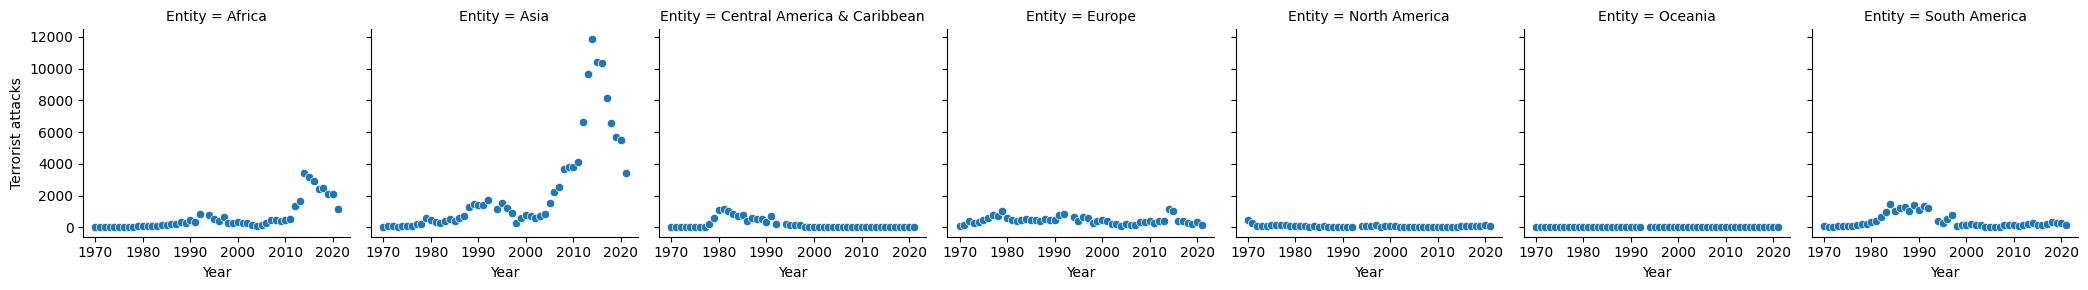

In [32]:
# Using FaceGrid to separate data into multiple graphs.

face_grid = sns.FacetGrid(cont_df, col="Entity")
face_grid.map(sns.scatterplot, "Year", "Terrorist attacks")
plt.show()

In [33]:
# Let's create a dataframe just for the Country's data
df_country = df.dropna()
df_country = df_country[(df_country['Entity']!='World')]
df_country

,Entity,Code,Year,Terrorist attacks
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,1
4,Afghanistan,AFG,1974,0
...,...,...,...,...
10512,Zimbabwe,ZWE,2017,3
10513,Zimbabwe,ZWE,2018,2
10514,Zimbabwe,ZWE,2019,2
10515,Zimbabwe,ZWE,2020,1


In [35]:
# Highest Countries According to Total of Terrorist attacks

char_bar = df_country.groupby(['Entity'])[['Terrorist attacks']].sum().reset_index()
char_bar = char_bar.sort_values(by=("Terrorist attacks"), ascending=False)

top = char_bar.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top['Entity'], y=top["Terrorist attacks"]))

fig.update_layout(title='Highest Countries According to Total of Terrorist attacks',
                          xaxis_title='Entity',
                          yaxis_title= "Terrorist attacks",
                          plot_bgcolor='#F0EEED',
                          paper_bgcolor='#F0EEED',
                          font=dict(color='black'))

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)


In [36]:
# Lowest Countries According to Total of Terrorist attacks

char_bar = df_country.groupby(['Entity'])[['Terrorist attacks']].sum().reset_index()
char_bar = char_bar.sort_values(by=("Terrorist attacks"), ascending=True)

top = char_bar.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top['Entity'], y=top["Terrorist attacks"]))

fig.update_layout(title='Lowest Countries According to Total of Terrorist attacks',
                          xaxis_title='Entity',
                          yaxis_title= "Terrorist attacks",
                          plot_bgcolor='#F0EEED',
                          paper_bgcolor='#F0EEED',
                          font=dict(color='black'))

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)
